In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
# Load the datasets
sierra_leone_data = pd.read_csv(r"D:\10x\data\week_0\projcet_one\data\sierraleone-bumbuna.csv")
togo_data = pd.read_csv(r"D:\10x\data\week_0\projcet_one\data\togo-dapaong_qc.csv")
benin_data = pd.read_csv(r"D:\10x\data\week_0\projcet_one\data\benin-malanville.csv" )

## Display the first few rows


In [7]:
# Add a country name attribute to each dataset
sierra_leone_data["Country"] = "Sierra Leone"
togo_data["Country"] = "Togo"
benin_data["Country"] = "Benin"


In [8]:
# Drop the 'Comments' column if it exists in all datasets
if "Comments" in sierra_leone_data.columns:
    sierra_leone_data = sierra_leone_data.drop(columns=["Comments"])
if "Comments" in togo_data.columns:
    togo_data = togo_data.drop(columns=["Comments"])
if "Comments" in benin_data.columns:
    benin_data = benin_data.drop(columns=["Comments"])


EDA

In [10]:
# Merge all datasets
merged_data = pd.concat([sierra_leone_data, togo_data, benin_data], ignore_index=True)
print(merged_data['Country'].unique())
# Save the merged dataset
merged_file_path = "../data/merged_solar_data.csv"
merged_data.to_csv(merged_file_path, index=False)

print(f"Merged data has been saved to {merged_file_path}")

['Sierra Leone' 'Togo' 'Benin']
Merged data has been saved to ../data/merged_solar_data.csv


In [11]:
# Load the merged dataset
merged_data = pd.read_csv("../data/merged_solar_data.csv")

In [12]:
# Quick overview of the data
print("Dataset Overview:")
print(merged_data.head())
print("\nData Summary:")
print(merged_data.describe())
print("\nMissing Values:")
print(merged_data.isnull().sum())

Dataset Overview:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

        Country  
0  Sierra Leone  
1  Sierra Leone  
2  Sierra Leone  
3  Sierra Leone  
4 

In [13]:
# Summary statistics for numerical columns
# Drop rows with missing values (if necessary)
merged_data = merged_data.dropna()
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'], errors='coerce')

merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])

# Add a 'Month' column for time-based grouping
merged_data['Month'] = merged_data['Timestamp'].dt.month

In [14]:
print(merged_data['Country'].unique())
print(merged_data['Country'].value_counts())

['Sierra Leone' 'Togo' 'Benin']
Country
Sierra Leone    525600
Togo            525600
Benin           525600
Name: count, dtype: int64


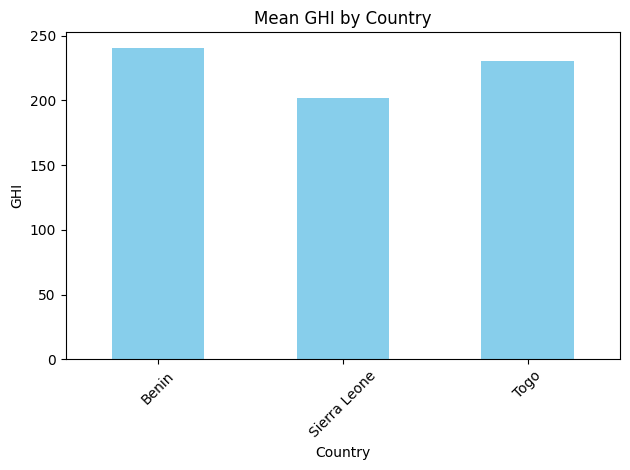

In [15]:
# Distribution of Global Horizontal Irradiance (GHI)
country_groups = merged_data.groupby("Country")
# 1. **Mean GHI by Country**
mean_ghi_by_country = merged_data.groupby("Country")["GHI"].mean()
mean_ghi_by_country.plot(kind="bar", color="skyblue")
plt.title("Mean GHI by Country")
plt.ylabel("GHI")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


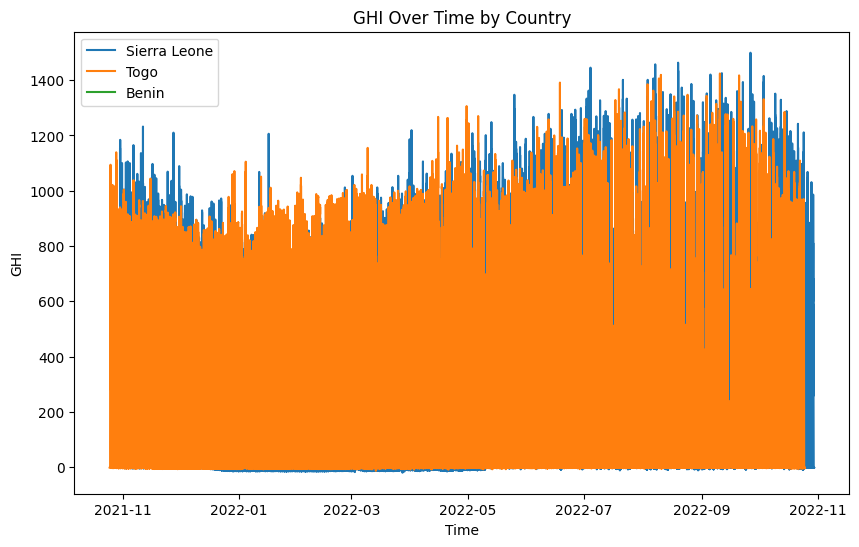

In [16]:
# ---------------------------
# Visualizations
# ---------------------------

# 1. **Mean GHI by Country**

# 2. **Time-Series Analysis**
# Plot GHI over time for each country
plt.figure(figsize=(10, 6))
for country in merged_data['Country'].unique():
    country_data = merged_data[merged_data['Country'] == country]
    plt.plot(country_data['Timestamp'], country_data['GHI'], label=country)
plt.title("GHI Over Time by Country")
plt.xlabel("Time")
plt.ylabel("GHI")
plt.legend()
plt.show()


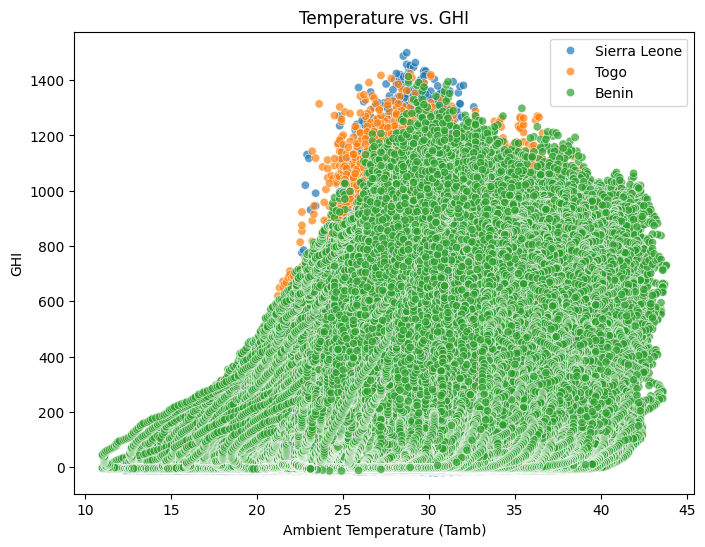

In [17]:
# 3. **Correlation Matrix (Country-Specific)**
# 4. **Temperature vs. Solar Irradiance**
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x="Tamb", y="GHI", hue="Country", alpha=0.7)
plt.title("Temperature vs. GHI")
plt.xlabel("Ambient Temperature (Tamb)")
plt.ylabel("GHI")
plt.legend()
plt.show()

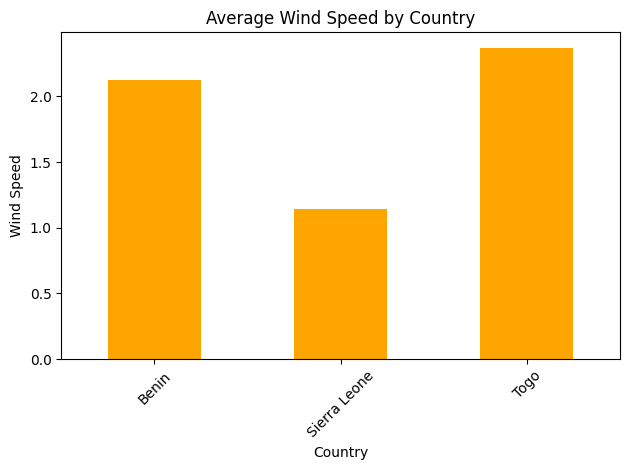

In [18]:
# 5. **Wind Speed Analysis by Country**
wind_speed_summary = merged_data.groupby("Country")["WS"].mean()
wind_speed_summary.plot(kind="bar", color="orange")
plt.title("Average Wind Speed by Country")
plt.ylabel("Wind Speed")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

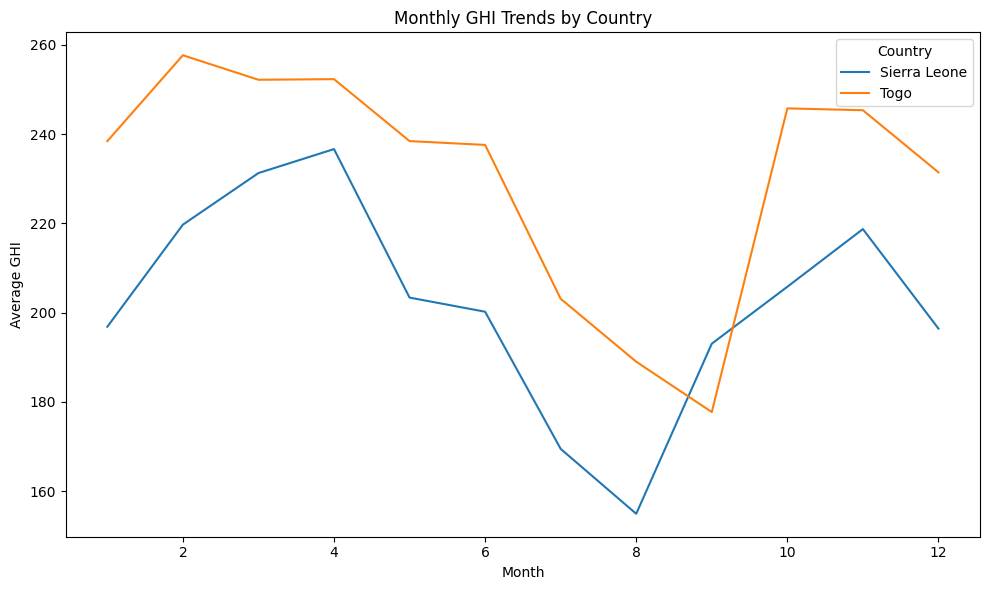

In [22]:
# 6. **Monthly Trends (GHI)**
monthly_ghi = merged_data.groupby(["Country", "Month"])["GHI"].mean().unstack(level=0)
monthly_ghi.plot(kind="line", figsize=(10, 6))
plt.title("Monthly GHI Trends by Country")
plt.ylabel("Average GHI")
plt.xlabel("Month")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

In [25]:
merged_data.to_csv("../data/clean/cleaned_merged_solar_data.csv", index=False)
print("\nCleaned and processed data has been saved to 'cleaned_merged_solar_data.csv'")


Cleaned and processed data has been saved to 'cleaned_merged_solar_data.csv'
